<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Checking-for-NA-values" data-toc-modified-id="Checking-for-NA-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Checking for NA values</a></span></li><li><span><a href="#Checking-different-types-of-variables" data-toc-modified-id="Checking-different-types-of-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking different types of variables</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li></ul></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion:</a></span></li></ul></div>

Gold Price Data

Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

# Data

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset

In [2]:
data = pd.read_csv("gld_price_data.csv")

In [3]:
data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5)
memory usage: 89.6 KB


# Checking for NA values

In [5]:

data[data.isnull().any(axis=1)]

,Date,SPX,GLD,USO,SLV,EUR/USD


There is no NA values

# Checking different types of variables

In [6]:
categorical = [var for var in data.columns if data[var].dtype == 'O']


discrete = [ var for var in data.columns if var not in categorical
            and len(data[var].unique())<10 
           ]

continuous = [var for var in data.columns if var not in categorical and var not in discrete]
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(categorical)} categorical variables')

There are 5 continuous variables
There are 0 discrete variables
There are 1 categorical variables


# Exploratory Analysis

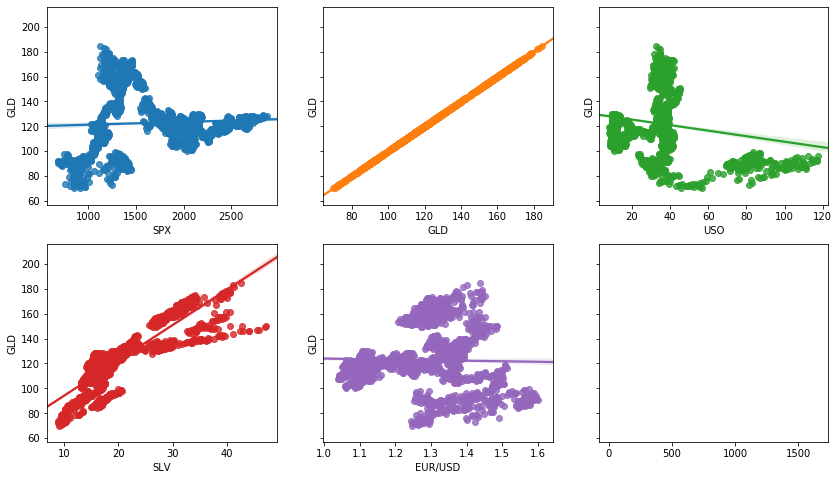

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=2,sharey=True,figsize=(14,8))
axs = axs.flatten()

for i, var in enumerate(continuous):
    if var != "":
        sns.regplot(x=var, y="GLD", data=data, ax=axs[i]);


Text(0.5, 1.05, 'Correlation of df Features')

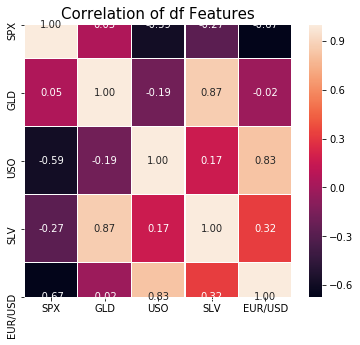

In [8]:
#Now see the correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [9]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



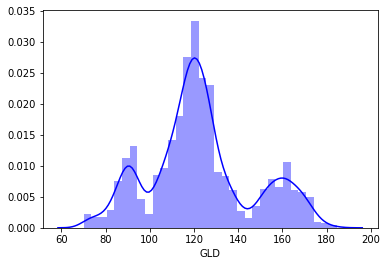

In [10]:
#Lets Check our target variable
sns.distplot(data['GLD'], color = 'blue')

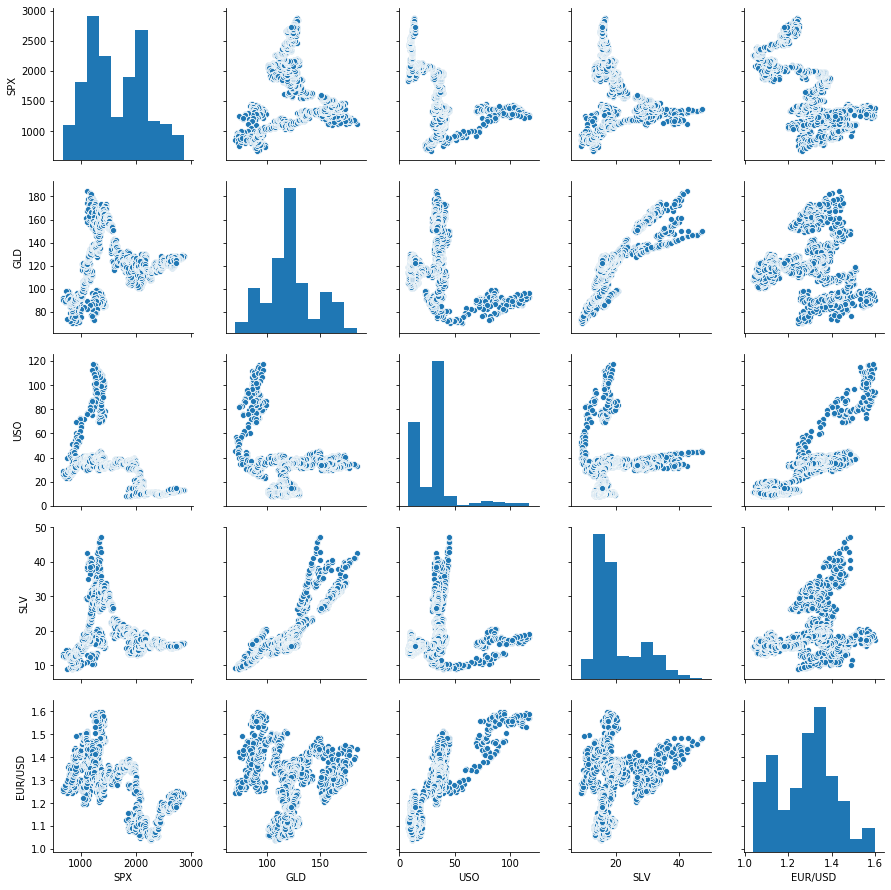

In [11]:
sns.pairplot(data)

# Models

## Linear Model

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [13]:
# split into training and test data set 
data= data.drop('Date', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data.drop('GLD', axis=1),data['GLD'], random_state = 0)

In [14]:
# create pipeline
reg_norm_pipe = Pipeline([
    # regression
    ('norm_reg', LinearRegression())
])

In [15]:
# let's fit the pipeline
reg_norm_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = reg_norm_pipe.predict(X_train)
X_test_preds = reg_norm_pipe.predict(X_test)

In [16]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 62.932073204087075
train rmse: 7.9329737932308255
train r2: 0.8851829349434134

test mse: 68.4157374724238
test rmse: 8.271380626740847
test r2: 0.8690802464545342


## Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 0,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.936, MSE test data: 4.363
R2 train data: 0.998, R2 test data: 0.992


# Conclusion:

Random Forest Regressor gives the best predictive model with accuracy of 99.2%